# NLP Sentiment Project — Two-Track

This project builds two end-to-end sentiment classifiers on the NLTK **`movie_reviews`** dataset to contrast **classical NLP** with **modern transformers**:

- **Track A (Baseline, fast):** TF–IDF → Logistic Regression  
  *Strengths:* speed, interpretability (top n-grams), simple pipeline  
  *Weaknesses:* sparse, literal tokens (weak with negation/sarcasm & synonyms)

- **Track B (Transformer, still fast):** Pretrained Sentence-Transformers **MiniLM** (frozen encoder) → Logistic Regression  
  *Strengths:* dense contextual embeddings, captures meaning & word order  
  *Weaknesses:* feature weights aren’t directly word-level; needs encoder download

**Take aways**
- Text representation: **TF–IDF** vs. **contextual embeddings**
- Modeling: linear classifier (LogReg) over sparse vs. dense features
- Evaluation: **Accuracy, F1, ROC–AUC**, confusion matrices
- Interpretability & error analysis: top n-grams (Track A) vs. failure modes with embeddings (Track B)

**Data**
- NLTK `movie_reviews` (~2000 docs; 1000 pos / 1000 neg), stratified 80/20 split.

**Artifacts**
- `outputs/track_a/` and `outputs/track_b/` each contain:
  - `metrics.json` (Accuracy, F1, ROC–AUC + classification report)
  - `confusion_matrix.png`
  - `errors.csv` (misclassified reviews for manual inspection)
  - Model files (`model.joblib`, and for Track B also `encoder.txt`)


.

## Project files & steps

**Core files**
- `data.py` — loads NLTK **movie_reviews**, shuffles, stratified train/test split.
- `utils.py` — helpers: metrics → JSON, confusion matrix plot, top n-grams export, error CSV.
- `track_a_tfidf.py` — builds **TF-IDF → Logistic Regression** pipeline, saves all artifacts.
- `track_b_sbert.py` — **MiniLM sentence embeddings (frozen)** → Logistic Regression.
- `stretch_distilbert.py` — light fine-tune **DistilBERT** for 1–2 epochs.
- `predict.py` — load a saved model and classify custom text.

**Process (big picture)**
1. Load & split data (balanced pos/neg).
2. Vectorize text → **TF-IDF**.
3. Train **Logistic Regression**.
4. Evaluate (Accuracy, F1, ROC-AUC) + Confusion Matrix.
5. Explainability: **top weighted n-grams** (positive/negative).
6. Error analysis: misclassified reviews with probabilities.

# .

## What is NLP?

**Natural Language Processing (NLP)** is the field that teaches computers to read, write, and reason about human language.  
At a high level, NLP systems turn **text → numbers → predictions**:




### Why do we need numbers?
Algorithms can’t operate on raw characters; they need vectors. NLP builds those vectors so a model can detect patterns like *“great acting”, “boring plot”, “not bad”*.

### Two common ways to represent text
- **TF–IDF (bag of words/phrases):** counts how important each word/phrase is in a document. Simple and very interpretable, but mostly literal.  
- **Contextual embeddings (transformers):** a neural encoder (e.g., MiniLM, DistilBERT) maps a whole sentence to a dense vector that captures **meaning in context** (“not bad” ≠ “bad”).

### What the project is doing
We’re building a **sentiment classifier** for movie reviews (positive vs negative) using three variants:

1. **Track A:** TF–IDF → Logistic Regression  
   - Teaches the classic pipeline and why certain n-grams drive decisions.
2. **Track B:** Pretrained **MiniLM** sentence embeddings (frozen) → Logistic Regression  
   - Gets transformer-level semantics without training a big model.
3. **Stretch:** **DistilBERT** fine-tuned end-to-end for 1–2 epochs  
   - Adapts the encoder to our task for potentially better accuracy.

Each model outputs a **probability** of “positive”; we apply a **threshold** (default 0.50) to make a label. We evaluate with **Accuracy, F1, ROC-AUC**, and a **confusion matrix**. We also inspect **errors** to see where models struggle (negation, sarcasm, out-of-domain text).

### Why this matters
NLP powers search, chatbots, moderation, summarization, and more. This project gives you a compact tour of:
- turning language into numbers (TF–IDF vs contextual embeddings),
- training and evaluating models,
- and understanding *why* they made a prediction (top n-grams, error analysis).

> **Limitations to expect:** short or ambiguous texts can be borderline; sarcasm and domain shifts are hard; probabilities may need **threshold tuning** or **calibration** for reliable decisions.


# Concepts, Math & Rationale — NLP Sentiment Project

This reference section defines key terms, shows the core math, and explains **why** each step exists in the project (Track A, Track B, and DistilBERT).


# .

## Keywords & Concepts (Glossary)

**Tokenization**  
Breaking text into smaller units (tokens). Classical pipelines use whitespace/punctuation rules; transformers use a subword tokenizer (e.g., WordPiece/BPE).

**n-gram**  
A sequence of *n* consecutive tokens (e.g., unigrams: “great”; bigrams: “very good”). Helpful to capture short phrases.

**TF–IDF (Term Frequency–Inverse Document Frequency)**  
Sparse numeric features where each dimension is a word/phrase. High when a term is frequent in a document (TF) but rare across the corpus (IDF).

**Top n-grams**  
The most influential TF–IDF features according to the classifier’s learned weights. Positive weight → pushes toward “positive” class; negative weight → toward “negative”.

**Logistic Regression (binary)**  
A linear model that maps features → probability via a sigmoid. With L2 regularization it’s robust and fast.

**Confusion Matrix**  
2×2 table at a chosen threshold:  
- **TP** (true positives), **FP**, **FN**, **TN**.  
High diagonal (TP+TN) = good.

**Precision / Recall / F1**  
Precision: of predicted positives, how many are correct?  
Recall: of true positives, how many did we find?  
F1: harmonic mean of precision & recall (balances both).

**ROC–AUC**  
Threshold-free measure: probability a random positive is ranked above a random negative by the model’s score.

**Contextual Embeddings**  
Dense vectors that represent a text *in context*. Same word can map differently depending on surrounding words (e.g., “bank” of a river vs. “bank” loan).

**Transformer**  
Neural architecture using self-attention to relate all tokens to each other in parallel. Strong at modeling long-range dependencies.

**Encoder (Transformer)**  
The stack that reads tokens and outputs hidden states/embeddings. Sentence encoders (e.g., MiniLM) pool token states to a single vector per text.

**MiniLM (Sentence-Transformers)**  
A compact transformer optimized for sentence embeddings (e.g., `all-MiniLM-L6-v2` returns ~384-dim vectors). Typically **frozen** (no training) in Track B.

**DistilBERT**  
A distilled (smaller, faster) version of BERT. In the stretch step we **fine-tune** it end-to-end for the task.

**Calibration / Threshold**  
Converting probabilities to labels uses a threshold (default 0.50). Calibration techniques adjust probabilities to match real-world frequencies better.

**Out-of-domain text**  
Inputs that don’t look like the training data (e.g., a pizza sentence in a movie-review classifier). Models may behave unpredictably; embeddings often generalize better.


# .

## Math Appendix 

### TF–IDF
Let $N$ be the number of documents and $\mathrm{df}(t)$ the number of documents containing term $t$.

**Term Frequency (TF)** (term $t$ in document $d$):  
$\mathrm{tf}(t,d) = \text{count of } t \text{ in } d$

**Inverse Document Frequency (IDF)** (smoothed as in scikit-learn):  
$$
\mathrm{idf}(t) = \ln\!\frac{1+N}{1+\mathrm{df}(t)} + 1
$$

**TF–IDF:**  
$$
\mathrm{tfidf}(t,d) = \mathrm{tf}(t,d)\cdot \mathrm{idf}(t)
$$

---

### Logistic Regression (binary)

**Score:** $z=\mathbf{w}^\top \mathbf{x}+b$

**Probability (positive):**  
$$
\hat{y}=\sigma(z)=\frac{1}{1+e^{-z}}
$$

**Loss** (binary cross-entropy) **+ L2 regularization:**  
$$
\mathcal{L}=-\frac{1}{m}\sum_{i=1}^m\big[y_i\log\hat{y}_i+(1-y_i)\log(1-\hat{y}_i)\big]
+\frac{\lambda}{2}\,\lVert \mathbf{w}\rVert_2^2
$$

**Regularization note:** in scikit-learn, $C = 1/\lambda$ (larger $C \Rightarrow$ weaker regularization).

---

### Precision / Recall / F1
$$
\mathrm{Precision}=\frac{TP}{TP+FP},\quad
\mathrm{Recall}=\frac{TP}{TP+FN},\quad
F1=2\cdot\frac{\mathrm{Precision}\cdot\mathrm{Recall}}
{\mathrm{Precision}+\mathrm{Recall}}
$$

---

### ROC–AUC
Interpretation: probability that a random positive example receives a higher score than a random negative.  
Computed as the **area under the ROC curve** (TPR vs FPR across thresholds).

---

### Transformer self-attention (intuition)
$$
\mathrm{Attention}(Q,K,V) = \mathrm{softmax}\!\left(\frac{QK^\top}{\sqrt{d_k}}\right)\!V
$$
Each token attends to all others, creating contextual representations.

---

### Sentence embeddings
A sentence encoder $f(\cdot)$ produces a fixed-size vector
$\mathbf{e}=f(x)\in\mathbb{R}^d$ (e.g., mean-pooled token states).  
A linear head then predicts:
$$
\hat{y}=\sigma(\mathbf{w}^\top \mathbf{e}+b)
$$


# .

## Purpose of Each Major Step (What & Why)

1) **Load & Split Data**  
   Ensure class balance and a reproducible **train/test** split (stratified).  
   *Shows:* clear separation of training and evaluation to prevent leakage.

2) **Track A — TF–IDF → Logistic Regression**  
   Build a strong **baseline** with interpretable features.  
   *Shows:* How far classic bag-of-words can go with good n-gram choices.

3) **Metrics & Confusion Matrix (Track A)**  
   Quantify performance: **Accuracy, F1, ROC–AUC**; locate error types via confusion matrix.  
   *Shows:* Overall quality + where the model errs (FP vs FN).

4) **Explainability: Top n-grams (Track A)**  
   List most positive/negative n-grams by learned weights.  
   *Shows:* Concrete textual cues driving decisions (transparent model behavior).

5) **Error Analysis (Track A)**  
   Inspect **misclassified** examples; sort by uncertainty (probabilities ≈ 0.5).  
   *Shows:* Failure modes (sarcasm, negation, long sentences, domain shift).

6) **Track B — MiniLM Embeddings (frozen) → Logistic Regression**  
   Replace sparse TF–IDF with **dense contextual embeddings** (no fine-tune).  
   *Shows:* Lift from semantics without training a big model.

7) **Metrics & Confusion Matrix (Track B)**  
   Compare scores and error patterns vs Track A.  
   *Shows:* Whether embeddings handle context/negation/synonyms better.

8) **(Optional) DistilBERT Fine-Tune**  
   End-to-end task adaptation for a small transformer, **1–3 epochs**.  
   *Shows:* Benefit from updating the encoder + head on the target domain.

9) **Predict Interface (CLI / Notebook)**  
   Score any text with Track A/B/DistilBERT; adjust **thresholds**.  
   *Shows:* Practical deployment behavior and threshold sensitivity.

10) **Comparison & Significance (McNemar)**  
   Head-to-head on the same test items; statistical test of accuracy difference.  
   *Shows:* Whether gains are likely real vs sampling noise.

11) **(Optional) Calibration**  
   Align probabilities to reality (isotonic/Platt).  
   *Shows:* Better decision-making when probabilities matter (ranking, risk).


# .

## Reading the Charts & Tables

**Confusion Matrix (PNG)**  
- Top-left (TN): negatives correctly predicted.  
- Bottom-right (TP): positives correctly predicted.  
- Top-right (FP): predicted positive when actually negative.  
- Bottom-left (FN): predicted negative when actually positive.  
*Look for a strong diagonal.* If FP ≫ FN, your threshold may be too low (too many positives); if FN ≫ FP, threshold may be too high.

**Top n-grams (CSV/Table, Track A)**  
- **Positive list**: features with largest positive weights → strongest pushes toward class 1.  
- **Negative list**: features with most negative weights → pushes toward class 0.  
*Watch for spurious artifacts* (e.g., actor names, punctuation) indicating overfitting.

**Metrics Table**  
- **Accuracy**: overall correctness.  
- **F1**: balances precision/recall, robust under mild imbalance.  
- **ROC–AUC**: ranking quality across all thresholds; helpful when threshold is adjustable.

**Error Tables (CSV/Table)**  
- **Most uncertain** errors: scores near 0.5 — ambiguous language or weak evidence.  
- **High-confidence FP/FN**: likely systematic weaknesses (e.g., negation, sarcasm, domain shift).

**ROC Curve (optional cell)**  
- Curve closer to the **top-left** is better; **AUC** closer to 1 is stronger ranking performance.

**Predict Output Table (Notebook/CLI)**  
- `*_prob` is the **positive probability**; `*_pred` is the hard label after thresholding.  
- Disagreement across models is expected—compare **confidence** and **failure modes**.


# .

## Track-Specific Notes & Gotchas

**Track A (TF–IDF + LR)**  
+ Very fast, interpretable (top n-grams), strong baseline  
– Literal: struggles with synonymy, long-range dependencies, and negation like “not bad” unless the bigram appears

**Track B (MiniLM embeddings + LR)**  
+ Strong *semantic* prior without training; often better on context/negation  
– Weights aren’t tied to words → less transparent than TF–IDF; relies on encoder’s generalization

**DistilBERT (fine-tuned)**  
+ Adapts encoder to your task/domain; can surpass frozen embeddings with a couple epochs  
– Needs more compute; with very small fine-tunes, probabilities can be conservative (many near 0.5). Consider 1 extra epoch or slight LR/threshold tuning.

**Thresholds & Calibration**  
- If you care about **precision**, raise threshold; for **recall**, lower it.  
- Calibrate if you use probabilities for ranking/decisions (isotonic/Platt).


# .

# Track A Report — TF-IDF + Logistic Regression (Explainability + Error Analysis)

This notebook summarizes **Track A** of our NLP sentiment project on the NLTK `movie_reviews` dataset.

You’ll see:
- A quick **project description** and **file overview**
- The **important concepts & math** (TF, IDF, TF-IDF, Logistic Regression, loss/regularization, metrics)
- Your **outputs** from Track A: overall metrics, confusion matrix, **top n-grams**, and **misclassified examples**

> **Assumption**: You already ran `python track_a_tfidf.py` and artifacts exist in `outputs/track_a/`.  
> If not, run it first, then come back here.


## Concepts & Math (what’s going on under the hood)

### Tokenization & Features (TF-IDF)
We turn text into numeric features with **TF-IDF** on unigrams & bigrams.

- **Term Frequency (TF)** for term \(t\) in document \(d\):  
  \[
  \mathrm{tf}(t,d) = \text{count of } t \text{ in } d
  \]
- **Document Frequency (DF)** for term \(t\): number of documents that contain \(t\).
- **Inverse Document Frequency (IDF)** (scikit-learn’s smoothed form):  
  \[
  \mathrm{idf}(t) = \log\frac{1 + N}{1 + \mathrm{df}(t)} + 1
  \]
  where \(N\) is the total number of documents.
- **TF-IDF**:  
  \[
  \mathrm{tfidf}(t,d) = \mathrm{tf}(t,d) \cdot \mathrm{idf}(t)
  \]

**Intuition:** frequent-in-document terms get larger TF; rare-across-corpus terms get larger IDF.  
**Bigrams** (e.g., “highly recommend”) capture short phrases that single words miss.

### Logistic Regression (binary classification)
- Linear score: \( z = \mathbf{w}^\top \mathbf{x} + b \)  
- Probability (positive class):  
  \[
  \hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
  \]
- Decision rule: predict **1** if \( \hat{y} \ge 0.5 \) else **0**.
- Loss (binary cross-entropy) + L2 regularization:  
  \[
  \mathcal{L} = -\frac{1}{m}\sum_{i=1}^m \left[y_i \log \hat{y}_i + (1-y_i) \log (1-\hat{y}_i)\right] + \frac{\lambda}{2}\|\mathbf{w}\|_2^2
  \]
  In scikit-learn, **\(C = 1/\lambda\)** controls regularization (larger \(C\) → weaker regularization).

**Interpretability:** Each TF-IDF feature has a weight \(w_j\).  
Positive \(w_j\) pushes toward **positive**; negative \(w_j\) pushes toward **negative**.  
The **largest-magnitude** weights are most influential.

### Evaluation Metrics
- **Accuracy**: fraction correct.
- **Precision / Recall**: trade-off for the positive class.
- **F1**: \( 2 \cdot \frac{PR}{P+R} \), balances precision & recall.
- **ROC-AUC**: probability the classifier ranks a random positive above a random negative (over thresholds).
- **Confusion Matrix**: counts of TP, FP, FN, TN at threshold 0.5.


In [1]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt

# Where track_a_tfidf.py saved artifacts:
OUT_DIR = "outputs/track_a"  # change if your path is different

metrics_path = os.path.join(OUT_DIR, "metrics.json")
cm_path      = os.path.join(OUT_DIR, "confusion_matrix.png")
top_path     = os.path.join(OUT_DIR, "top_features.csv")
errors_path  = os.path.join(OUT_DIR, "errors.csv")

def _exists(p):
    ok = os.path.exists(p)
    print(("✓" if ok else "✗"), p)
    return ok

_ = [_exists(p) for p in [metrics_path, cm_path, top_path, errors_path]]


✓ outputs/track_a/metrics.json
✓ outputs/track_a/confusion_matrix.png
✓ outputs/track_a/top_features.csv
✓ outputs/track_a/errors.csv


## Metrics (Accuracy, F1, ROC-AUC)

These summarize overall performance. The classification report breaks down precision/recall/F1 per class.


In [2]:
if os.path.exists(metrics_path):
    with open(metrics_path) as f:
        metrics = json.load(f)
    print("=== Classification report ===")
    print(metrics.get("report", ""))

    # Small table view for quick glance
    pd.DataFrame([{
        "Accuracy": metrics.get("accuracy", None),
        "F1": metrics.get("f1", None),
        "ROC_AUC": metrics.get("roc_auc", None)
    }])
else:
    print("metrics.json not found. Run: python track_a_tfidf.py")


=== Classification report ===
              precision    recall  f1-score   support

           0      0.835     0.860     0.847       200
           1      0.856     0.830     0.843       200

    accuracy                          0.845       400
   macro avg      0.845     0.845     0.845       400
weighted avg      0.845     0.845     0.845       400



## Confusion Matrix

Higher diagonal counts (top-left & bottom-right) indicate better performance.  
Off-diagonal entries are misclassifications.


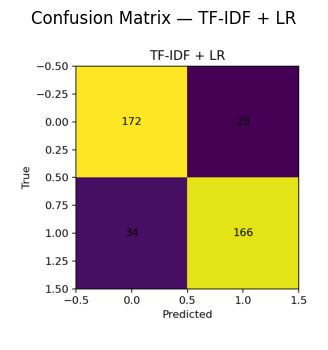

In [3]:
if os.path.exists(cm_path):
    img = plt.imread(cm_path)
    plt.figure(figsize=(4,4))
    plt.imshow(img)    # no explicit colors/style
    plt.axis('off')
    plt.title("Confusion Matrix — TF-IDF + LR")
    plt.show()
else:
    print("confusion_matrix.png not found. Run: python track_a_tfidf.py")


## Explainability — Top n-grams by weight

These are the most influential **positive** and **negative** features (by Logistic Regression coefficients).


In [4]:
if os.path.exists(top_path):
    tf = pd.read_csv(top_path)
    pos_df = tf[tf["type"]=="positive"].reset_index(drop=True)
    neg_df = tf[tf["type"]=="negative"].reset_index(drop=True)

    print("Top POSITIVE n-grams:")
    display(pos_df.head(25))

    print("Top NEGATIVE n-grams:")
    display(neg_df.head(25))
else:
    print("top_features.csv not found. Run: python track_a_tfidf.py")


Top POSITIVE n-grams:


,type,ngram,coef
0,positive,life,2.170307
1,positive,great,1.828752
2,positive,truman,1.595835
3,positive,world,1.507816
4,positive,family,1.388704
5,positive,excellent,1.299002
6,positive,best,1.207677
7,positive,fun,1.197831
8,positive,quite,1.189220
9,positive,war,1.186725


Top NEGATIVE n-grams:


,type,ngram,coef
0,negative,bad,-3.617136
1,negative,plot,-2.185276
2,negative,worst,-2.070985
3,negative,boring,-1.907022
4,negative,movie,-1.832592
5,negative,supposed,-1.656104
6,negative,stupid,-1.627691
7,negative,harry,-1.554583
8,negative,poor,-1.507256
9,negative,looks,-1.455901


## Error Analysis — Misclassified Reviews

We inspect misclassifications and their positive probabilities (`prob_pos`).
- **Uncertain** errors have probabilities near 0.5.
- High-confidence **false positives** (pred=1, true=0) have large `prob_pos`.
- High-confidence **false negatives** (pred=0, true=1) have small `prob_pos`.


In [5]:
import numpy as np

if os.path.exists(errors_path):
    errors_df = pd.read_csv(errors_path)
    print("Total misclassified:", len(errors_df))

    # Uncertainty: closeness to 0.5
    errors_df["uncertainty"] = (errors_df["prob_pos"] - 0.5).abs()

    print("\nMost uncertain 10 errors (prob near 0.5):")
    display(errors_df.sort_values("uncertainty").head(10))

    # High-confidence false positives: pred=1, true=0, prob_pos high
    print("\nHigh-confidence false positives (top 5):")
    fp = errors_df[(errors_df["true"]==0) & (errors_df["pred"]==1)]
    display(fp.sort_values("prob_pos", ascending=False).head(5))

    # High-confidence false negatives: pred=0, true=1, prob_pos low
    print("\nHigh-confidence false negatives (top 5):")
    fn = errors_df[(errors_df["true"]==1) & (errors_df["pred"]==0)]
    display(fn.sort_values("prob_pos", ascending=True).head(5))
else:
    print("errors.csv not found. Run: python track_a_tfidf.py")


Total misclassified: 62

Most uncertain 10 errors (prob near 0.5):


,true,pred,prob_pos,text_snippet,uncertainty
21,0,1,0.502114,"synopsis : original "" jurassic park "" survivor...",0.002114
40,1,0,0.492860,the first thing you notice about this movie is...,0.007140
22,1,0,0.491650,bob the happy bastard's quickie review : i mu...,0.008350
42,1,0,0.488350,i tried hard not like this movie without succe...,0.011650
49,1,0,0.483178,it's a fact that a good thriller or action mov...,0.016822
56,0,1,0.517117,a disappointing biography about the homosexual...,0.017117
17,1,0,0.481468,when a someone journeys to the theater to see ...,0.018532
12,1,0,0.478477,not since oliver stone's natural born killers ...,0.021523
36,0,1,0.521940,if you're into watching near on two hours of b...,0.021940
15,1,0,0.471430,if you've ever perused my college comedy diary...,0.028570



High-confidence false positives (top 5):


,true,pred,prob_pos,text_snippet,uncertainty
20,0,1,0.703782,terrence malick made an excellent 90 minute fi...,0.203782
55,0,1,0.685683,"after the recent animated debacles of , "" a ru...",0.185683
8,0,1,0.666424,this is not a simple plan about finding a plan...,0.166424
53,0,1,0.662965,shakespeare in love is quite possibly the most...,0.162965
13,0,1,0.643513,"in our time . in our modern world , where the...",0.143513



High-confidence false negatives (top 5):


,true,pred,prob_pos,text_snippet,uncertainty
0,1,0,0.208664,"in october of 1997 , audiences were dazzled by...",0.291336
60,1,0,0.261791,i think the first thing this reviewer should m...,0.238209
3,1,0,0.266439,i think the first thing this reviewer should m...,0.233561
9,1,0,0.286253,"harmless , silly and fun comedy about dim-witt...",0.213747
58,1,0,0.317022,plot : jet li is a chinese cop asked to help s...,0.182978


## What to look for in these outputs

- **Metrics table**: are Accuracy/F1/ROC-AUC in the 0.8–0.9 ballpark?
- **Confusion matrix**: diagonal cells should dominate. If not, investigate class imbalance or vectorizer settings.
- **Top n-grams**:
  - Positive side should include phrases like “excellent”, “well acted”, maybe “highly recommend”.
  - Negative side should include “boring”, “waste”, “poorly”, etc.
- **Errors**:
  - **Uncertain** examples → often nuanced language (mixed sentiment, sarcasm).
  - **High-confidence FP** → model is over-trusting certain positive words in negative context.
  - **High-confidence FN** → model missed positive cues (e.g., negation like “not bad”).


## Next steps

- **Track B (next notebook):** Use a pretrained transformer encoder (**MiniLM**) to create dense contextual embeddings, then train Logistic Regression. Compare metrics & failure cases to Track A.


# Track B Report — MiniLM Sentence Embeddings → Logistic Regression

This notebook summarizes **Track B** of our NLP sentiment project.

You’ll see:
- A quick **files & steps** reminder
- The **key concepts & math** for sentence embeddings + a linear head
- Your **outputs** from Track B: overall metrics, confusion matrix, and **misclassified examples**
- Notes on **interpretability** (why it differs from Track A)


## Files & Steps (Track B)

**Core files**
- `data.py` — loads NLTK **movie_reviews**, shuffles, stratified train/test split.
- `track_b_sbert.py` — encodes reviews using **Sentence-Transformers MiniLM** (frozen) → Logistic Regression.
- `utils.py` — helpers to save **metrics**, **confusion matrix**, and **errors** (misclassifications).
- *(Track A)* `track_a_tfidf.py` — TF–IDF → Logistic Regression (for comparison in the next step).

**Process**
1. Load & split data (same seed as Track A).
2. Encode each review with **MiniLM** → a dense vector (≈384-dim).
3. Train **LogReg** on these embeddings.
4. Evaluate (Accuracy, F1, ROC–AUC) + Confusion Matrix.
5. Inspect **misclassified** examples for targeted improvements.


## Concepts & Math — Sentence Embeddings + Linear Head

### From text to vectors
A pretrained **transformer encoder** (MiniLM) maps each review \( x \) to a **sentence embedding**:
\[
\mathbf{e} = f(x) \in \mathbb{R}^d
\]
- Tokenization → transformer layers → **pooling** (e.g., mean pooling) → one vector per text
- These embeddings are **contextual**: “not bad” differs from “bad”; “bank” in “river bank” vs “credit bank”

### Metrics
- **Accuracy**, **F1**, **ROC–AUC**, **Confusion Matrix** (same as Track A)

### Interpretability vs. Track A
- Track A: TF–IDF features ↔ words/phrases → weight directly explains an n-gram.
- Track B: weights live in **embedding space** → not tied to explicit n-grams (less word-level interpretability).


In [6]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt

# Where track_b_sbert.py saved artifacts:
OUT_DIR = "outputs/track_b"  # change if your path is different

metrics_path = os.path.join(OUT_DIR, "metrics.json")
cm_path      = os.path.join(OUT_DIR, "confusion_matrix.png")
errors_path  = os.path.join(OUT_DIR, "errors.csv")
encoder_path = os.path.join(OUT_DIR, "encoder.txt")

def _exists(p):
    ok = os.path.exists(p)
    print(("✓" if ok else "✗"), p)
    return ok

_ = [_exists(p) for p in [metrics_path, cm_path, errors_path, encoder_path]]


✓ outputs/track_b/metrics.json
✓ outputs/track_b/confusion_matrix.png
✓ outputs/track_b/errors.csv
✓ outputs/track_b/encoder.txt


## Metrics (Accuracy, F1, ROC–AUC)

These summarize overall performance. The classification report breaks down precision/recall/F1 per class.


In [7]:
if os.path.exists(metrics_path):
    with open(metrics_path) as f:
        metrics = json.load(f)
    print("=== Classification report (Track B) ===")
    print(metrics.get("report", ""))

    # Small table view for quick glance
    pd.DataFrame([{
        "Accuracy": metrics.get("accuracy", None),
        "F1": metrics.get("f1", None),
        "ROC_AUC": metrics.get("roc_auc", None)
    }])
else:
    print("metrics.json not found. Run: python track_b_sbert.py")


=== Classification report (Track B) ===
              precision    recall  f1-score   support

           0      0.644     0.660     0.652       200
           1      0.651     0.635     0.643       200

    accuracy                          0.647       400
   macro avg      0.648     0.647     0.647       400
weighted avg      0.648     0.647     0.647       400



## Confusion Matrix

Higher diagonal counts (top-left & bottom-right) indicate better performance.  
Off-diagonal entries are misclassifications.


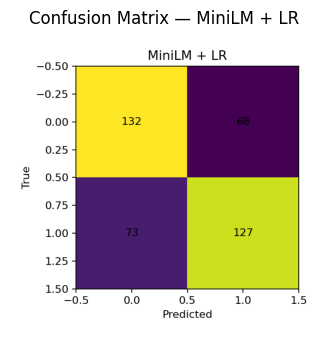

In [8]:
if os.path.exists(cm_path):
    img = plt.imread(cm_path)
    plt.figure(figsize=(4,4))
    plt.imshow(img)    # no explicit colors/style
    plt.axis('off')
    plt.title("Confusion Matrix — MiniLM + LR")
    plt.show()
else:
    print("confusion_matrix.png not found. Run: python track_b_sbert.py")


## Embedding Model 

`encoder.txt` records the Sentence-Transformers model name used by `track_b_sbert.py`.  
Typical choice here is **`sentence-transformers/all-MiniLM-L6-v2`** (≈384-dim embedding).


In [9]:
if os.path.exists(encoder_path):
    with open(encoder_path) as f:
        encoder_name = f.read().strip()
    print("Encoder used:", encoder_name)
else:
    print("encoder.txt not found. Run: python track_b_sbert.py")


Encoder used: sentence-transformers/all-MiniLM-L6-v2


## Error Analysis — Misclassified Reviews

We inspect misclassifications and their positive probabilities (`prob_pos`).
- **Uncertain** errors have probabilities near 0.5.
- High-confidence **false positives** (pred=1, true=0) have large `prob_pos`.
- High-confidence **false negatives** (pred=0, true=1) have small `prob_pos`.

Comparing these errors to Track A often reveals strengths in **context** and **negation** handling.


In [10]:
import numpy as np

if os.path.exists(errors_path):
    errors_df = pd.read_csv(errors_path)
    print("Total misclassified:", len(errors_df))

    # Uncertainty: closeness to 0.5
    errors_df["uncertainty"] = (errors_df["prob_pos"] - 0.5).abs()

    print("\nMost uncertain 10 errors (prob near 0.5):")
    display(errors_df.sort_values("uncertainty").head(10))

    # High-confidence false positives: pred=1, true=0, prob_pos high
    print("\nHigh-confidence false positives (top 5):")
    fp = errors_df[(errors_df["true"]==0) & (errors_df["pred"]==1)]
    display(fp.sort_values("prob_pos", ascending=False).head(5))

    # High-confidence false negatives: pred=0, true=1, prob_pos low
    print("\nHigh-confidence false negatives (top 5):")
    fn = errors_df[(errors_df["true"]==1) & (errors_df["pred"]==0)]
    display(fn.sort_values("prob_pos", ascending=True).head(5))
else:
    print("errors.csv not found. Run: python track_b_sbert.py")


Total misclassified: 141

Most uncertain 10 errors (prob near 0.5):


,true,pred,prob_pos,text_snippet,uncertainty
51,1,0,0.496924,if you've ever perused my college comedy diary...,0.003076
79,0,1,0.504262,one of the most respected names in american in...,0.004262
32,1,0,0.492708,note : some may consider portions of the follo...,0.007292
38,0,1,0.507837,michael robbins' hardball is quite the cinemat...,0.007837
55,0,1,0.508549,"old soldiers never die , they just turn into c...",0.008549
68,0,1,0.515829,i wonder if budget is at all a criterion for w...,0.015829
99,1,0,0.482412,"-- comedy , rated pg , runs about 1 : 40 -- st...",0.017588
31,1,0,0.481465,not since oliver stone's natural born killers ...,0.018535
129,0,1,0.518651,"georges polti once wrote a paper called "" the ...",0.018651
119,1,0,0.479396,""" through a spyglass , i could see everything...",0.020604



High-confidence false positives (top 5):


,true,pred,prob_pos,text_snippet,uncertainty
132,0,1,0.924659,the last of vampire-films offers plenty of blo...,0.424659
115,0,1,0.883779,one might expect a cathartic viewing experienc...,0.383779
19,0,1,0.850705,various films seen at the seattle film festiva...,0.350705
33,0,1,0.805687,""" the world on land -- it's just too big for ...",0.305687
114,0,1,0.803745,shakespeare in love is quite possibly the most...,0.303745



High-confidence false negatives (top 5):


,true,pred,prob_pos,text_snippet,uncertainty
26,1,0,0.117862,"harmless , silly and fun comedy about dim-witt...",0.382138
101,1,0,0.146098,""" desperate measures "" was something i was ex...",0.353902
87,1,0,0.154819,the first thing you notice about this movie is...,0.345181
123,1,0,0.163812,"aggressive , bleak , and unrelenting film abou...",0.336188
17,1,0,0.171599,notting hill's trailer is awful : a laughless ...,0.328401


## What to look for in these outputs

- **Metrics table**: does F1 or ROC–AUC match/exceed Track A?
- **Confusion matrix**: are diagonal cells dominant (like Track A)?
- **Errors**:
  - **Uncertain** examples → often nuanced or mixed sentiment.
  - **High-confidence FP/FN** → examine wording; MiniLM is usually better at **negation** and context (“not bad”), but can still fail on domain-specific slang or heavy sarcasm.

**Interpretability note:** Unlike Track A’s TF–IDF, the linear weights here act on **embedding dimensions**, not explicit n-grams. Use **error analysis** (and, later, saliency/attribution on transformer internals if you fine-tune) to understand behavior.


# Track A vs. Track B — Side-by-Side Comparison & Analysis

This notebook compares our two sentiment systems on NLTK `movie_reviews`:

- **Track A:** TF–IDF → Logistic Regression (interpretable, sparse features)
- **Track B:** Sentence-Transformers **MiniLM** (frozen encoder) → Logistic Regression (contextual, dense features)

We’ll:
1) Load both tracks’ **metrics** and **confusion matrices**  
2) **Recompute predictions** on the same test split to do head-to-head comparisons  
3) Run a **McNemar’s test** to check if accuracy differences are statistically significant  
4) Inspect **disagreements** (examples where one track is right and the other is wrong)


In [11]:

import os, json, math, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# Allow "from data import load_movie_reviews" when notebook is at project root
if '.' not in sys.path:
    sys.path.append('.')

from data import load_movie_reviews
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sentence_transformers import SentenceTransformer

# Paths for artifacts
A_DIR = "outputs/track_a"
B_DIR = "outputs/track_b"

A_MET = os.path.join(A_DIR, "metrics.json")
A_CM  = os.path.join(A_DIR, "confusion_matrix.png")
A_MDL = os.path.join(A_DIR, "model.joblib")

B_MET = os.path.join(B_DIR, "metrics.json")
B_CM  = os.path.join(B_DIR, "confusion_matrix.png")
B_MDL = os.path.join(B_DIR, "model.joblib")
B_ENC = os.path.join(B_DIR, "encoder.txt")

def _exists(p):
    ok = os.path.exists(p)
    print(("✓" if ok else "✗"), p)
    return ok

_ = [_exists(p) for p in [A_MET, A_CM, A_MDL, B_MET, B_CM, B_MDL, B_ENC]]


✓ outputs/track_a/metrics.json
✓ outputs/track_a/confusion_matrix.png
✓ outputs/track_a/model.joblib
✓ outputs/track_b/metrics.json
✓ outputs/track_b/confusion_matrix.png
✓ outputs/track_b/model.joblib
✓ outputs/track_b/encoder.txt


## High-level metrics (from saved JSON)

We’ll load `metrics.json` from each track and put them side-by-side.


In [12]:
def load_metrics(path):
    with open(path) as f:
        return json.load(f)

if os.path.exists(A_MET) and os.path.exists(B_MET):
    mA = load_metrics(A_MET)
    mB = load_metrics(B_MET)

    # Compact view
    comp = pd.DataFrame([
        {"Track": "A (TF-IDF + LR)", "Accuracy": mA["accuracy"], "F1": mA["f1"], "ROC_AUC": mA["roc_auc"]},
        {"Track": "B (MiniLM + LR)", "Accuracy": mB["accuracy"], "F1": mB["f1"], "ROC_AUC": mB["roc_auc"]},
    ])
    comp
else:
    print("Missing metrics.json — run both training scripts first.")


## Classification reports (per-class precision/recall/F1)

Useful to see if a model is skewing toward one class.


In [13]:
if os.path.exists(A_MET) and os.path.exists(B_MET):
    print("=== Track A — Classification Report ===")
    print(load_metrics(A_MET).get("report", ""))

    print("\n=== Track B — Classification Report ===")
    print(load_metrics(B_MET).get("report", ""))


=== Track A — Classification Report ===
              precision    recall  f1-score   support

           0      0.835     0.860     0.847       200
           1      0.856     0.830     0.843       200

    accuracy                          0.845       400
   macro avg      0.845     0.845     0.845       400
weighted avg      0.845     0.845     0.845       400


=== Track B — Classification Report ===
              precision    recall  f1-score   support

           0      0.644     0.660     0.652       200
           1      0.651     0.635     0.643       200

    accuracy                          0.647       400
   macro avg      0.648     0.647     0.647       400
weighted avg      0.648     0.647     0.647       400



## Confusion matrices

We’ll display each confusion matrix image saved by the training scripts.  
Higher diagonal counts indicate better performance.


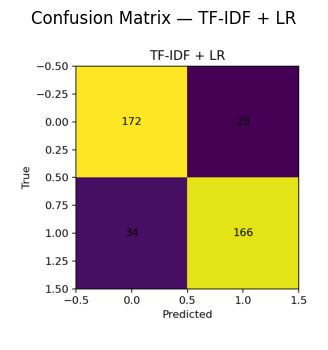

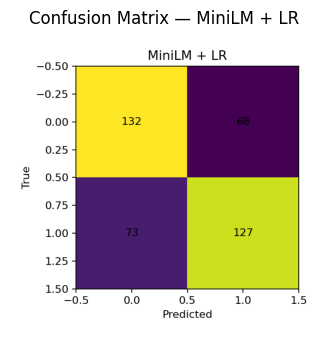

In [14]:
for title, path in [("TF-IDF + LR", A_CM), ("MiniLM + LR", B_CM)]:
    if os.path.exists(path):
        img = plt.imread(path)
        plt.figure(figsize=(4,4))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Confusion Matrix — {title}")
        plt.show()
    else:
        print("Missing:", path)


## Head-to-head on the same test split

To compare the models directly (and run a significance test), we’ll **recreate the test split** and recompute predictions from the saved models:

- **Track A:** load `model.joblib` (full scikit Pipeline), call `predict` and `predict_proba`
- **Track B:** load `encoder.txt` + `model.joblib`, re-encode test texts with the same MiniLM, then call `predict` and `predict_proba`


In [15]:
# Recreate the same split used by both tracks (seed=42)
X_train, X_test, y_train, y_test = load_movie_reviews(seed=42)

# --- Track A ---
pipeA = joblib.load(A_MDL)
A_pred = pipeA.predict(X_test)
A_prob = pipeA.predict_proba(X_test)[:, 1]

# --- Track B ---
with open(B_ENC) as f:
    enc_name = f.read().strip()
enc = SentenceTransformer(enc_name)
Xte_emb = enc.encode(X_test, batch_size=64, convert_to_numpy=True, show_progress_bar=False)

clfB = joblib.load(B_MDL)
B_pred = clfB.predict(Xte_emb)
B_prob = clfB.predict_proba(Xte_emb)[:, 1]

# Sanity metrics (should be very close to JSON results)
tab = pd.DataFrame([
    {"Track": "A (TF-IDF + LR)",
     "Accuracy": accuracy_score(y_test, A_pred),
     "F1": f1_score(y_test, A_pred),
     "ROC_AUC": roc_auc_score(y_test, A_prob)},
    {"Track": "B (MiniLM + LR)",
     "Accuracy": accuracy_score(y_test, B_pred),
     "F1": f1_score(y_test, B_pred),
     "ROC_AUC": roc_auc_score(y_test, B_prob)},
])
tab


,Track,Accuracy,F1,ROC_AUC
0,A (TF-IDF + LR),0.8450,0.842640,0.905375
1,B (MiniLM + LR),0.6475,0.643038,0.716125


## McNemar’s test (paired accuracy significance)

We test whether the **difference in accuracy** between Track A and B is statistically significant on the **same** test examples.

- Build a 2×2 table over test items:  
  `n01` = A correct, B wrong; `n10` = A wrong, B correct  
- Under the null (no difference), `min(n01, n10)` ~ Binomial(n01+n10, 0.5)
- Two-sided exact p-value = \( 2 \sum_{k=0}^{\min(n01,n10)} \binom{n}{k} 0.5^n \) (clipped to 1.0)

A small p-value (e.g., < 0.05) suggests the accuracy difference is unlikely due to chance.


In [16]:
# Booleans: correctness per item
A_correct = (A_pred == y_test)
B_correct = (B_pred == y_test)

# Contingency counts
n01 = int(np.sum(A_correct & ~B_correct))  # A correct, B wrong
n10 = int(np.sum(~A_correct & B_correct))  # A wrong, B correct
n = n01 + n10
b = min(n01, n10)

def mcnemar_exact_two_sided(n01, n10):
    n = n01 + n10
    if n == 0:
        return 1.0
    b = min(n01, n10)
    # two-sided exact p-value
    p = 0.0
    for k in range(0, b + 1):
        p += math.comb(n, k) * (0.5 ** n)
    p = min(1.0, 2.0 * p)
    return p

pval = mcnemar_exact_two_sided(n01, n10)

pd.DataFrame([{
    "n01 (A correct, B wrong)": n01,
    "n10 (A wrong, B correct)": n10,
    "n01 + n10": n,
    "McNemar p-value": pval
}])


,"n01 (A correct, B wrong)","n10 (A wrong, B correct)",n01 + n10,McNemar p-value
0,104,25,129,1.195585e-12


## Disagreement analysis (who fixes whose mistakes?)

We’ll list:
- **B fixes A**: examples where Track B is **correct** and Track A is **wrong**  
- **A fixes B**: examples where Track A is **correct** and Track B is **wrong**  

We’ll show the **most confident corrections** first (furthest probabilities from 0.5).


In [17]:
# Build a DataFrame with everything we need
df = pd.DataFrame({
    "text": X_test,
    "y_true": y_test,
    "A_pred": A_pred,
    "A_prob": A_prob,
    "B_pred": B_pred,
    "B_prob": B_prob,
})

# Helper: shorten text for display
def snip(s, n=400):
    return s.replace("\n", " ")[:n]

# B fixes A: A wrong, B correct
BA = df[(df.A_pred != df.y_true) & (df.B_pred == df.y_true)].copy()
BA["B_confidence"] = (BA["B_prob"] - 0.5).abs()
BA_sorted = BA.sort_values("B_confidence", ascending=False)

# A fixes B: B wrong, A correct
AB = df[(df.B_pred != df.y_true) & (df.A_pred == df.y_true)].copy()
AB["A_confidence"] = (AB["A_prob"] - 0.5).abs()
AB_sorted = AB.sort_values("A_confidence", ascending=False)

print("B fixes A — top 5 (most confident B):")
display(BA_sorted.assign(text_snippet=BA_sorted["text"].map(snip))[["y_true","A_pred","A_prob","B_pred","B_prob","text_snippet"]].head(5))

print("A fixes B — top 5 (most confident A):")
display(AB_sorted.assign(text_snippet=AB_sorted["text"].map(snip))[["y_true","A_pred","A_prob","B_pred","B_prob","text_snippet"]].head(5))


B fixes A — top 5 (most confident B):


,y_true,A_pred,A_prob,B_pred,B_prob,text_snippet
244,0,1,0.521940,0,0.205965,if you're into watching near on two hours of b...
205,1,0,0.447670,1,0.780857,"in 1987 the stock market crashed , and oliver ..."
309,1,0,0.457404,1,0.779233,i have seen several ( but not that many ) wood...
154,0,1,0.575047,0,0.247783,the yet-to-be-released krippendorf's tribe is ...
181,1,0,0.491650,1,0.730745,bob the happy bastard's quickie review : i mu...


A fixes B — top 5 (most confident A):


,y_true,A_pred,A_prob,B_pred,B_prob,text_snippet
185,0,0,0.180774,1,0.559128,"with his successful books and movies , michael..."
83,1,1,0.798720,0,0.492708,note : some may consider portions of the follo...
19,1,1,0.778846,0,0.466468,alchemy is steeped in shades of blue . kieslo...
312,0,0,0.232454,1,0.542987,"it rocks-actually , lots of rocks fly at us or..."
73,0,0,0.236279,1,0.549776,cashing in on the success of white men can't j...


## Takeaways

- **Which track wins?** Check F1 and ROC–AUC side-by-side.  
- **Significance:** If McNemar’s p-value < 0.05, the accuracy difference is likely real (not just sampling noise).  
- **Error patterns:**  
  - If **Track B** fixes many of **Track A**’s errors with negation/multi-word context (e.g., “not bad”), embeddings are helping.  
  - If **Track A** fixes quirky cases where specific phrases dominate, TF–IDF’s sparse n-grams might be catching lexical cues MiniLM under-weights.

**What to try next (fast):**
- Track B: test a slightly larger encoder (e.g., `all-MiniLM-L12-v2`) or tune `C`.  
- Track A: try `ngram_range=(1,3)` or character n-grams (robust to misspellings).  
- Add a tiny **calibration** step if you care about probability quality.


## Next Steps


1) DistilBERT light fine-tune (1–2 epochs)  
2) Simple “predict” CLI to score your own sentences


# NLP Sentiment Project — DistilBERT Fine-Tuning (Results)

This project contrasts **classical NLP** vs **transformers** on NLTK `movie_reviews`:

- **Track A:** TF–IDF → Logistic Regression (interpretable, sparse)
- **Track B:** Pretrained **MiniLM** embeddings (frozen) → Logistic Regression (dense, contextual)
- **Stretch:** **DistilBERT** end-to-end fine-tune for 1–2 epochs (this notebook)

**This notebook**: explains the DistilBERT fine-tuning setup, shows your saved outputs (metrics, confusion matrix, misclassifications), and provides optional cells to reload the saved HF model and re-evaluate.


## What’s inside

- Files & steps for the DistilBERT stretch
- Concepts & math (fine-tuning a classifier head + encoder)
- Load and display your **metrics**, **confusion matrix**, and **misclassified examples**
- (Optional) Reload the saved HF model → recompute test predictions (for sanity/ROC)
- Practical tips if metrics look lower than expected


## Files & Steps

**Files created by `stretch_distilbert.py`**
- `outputs/stretch/metrics.json` — Accuracy, F1, ROC–AUC, classification report
- `outputs/stretch/confusion_matrix.png` — confusion matrix image
- `outputs/stretch/errors.csv` — misclassified examples with `prob_pos`
- `outputs/stretch/metrics_trainer.json` — Hugging Face Trainer eval (acc/F1)
- `outputs/stretch/model/` — saved HF model + tokenizer

**Process (tiny fine-tune)**
1. Load the same stratified split (seed=42) as Tracks A/B.
2. Tokenize with DistilBERT, truncate to `max_len` (default 256).
3. Fine-tune `distilbert-base-uncased` with a new classification head for 1–2 epochs.
4. Evaluate on the test set; save artifacts identical in spirit to Tracks A/B.



## Concepts & Math (DistilBERT fine-tuning)

- We learn a classifier **and** adapt the encoder:
  \[
  \mathbf{h} = \text{DistilBERT}(x), \quad
  z = \mathbf{W}\,\mathrm{pool}(\mathbf{h}) + \mathbf{b}, \quad
  \hat{y} = \sigma(z)
  \]
  where `pool` is typically the hidden state used by the head (DistilBERT uses a small pre-classifier layer).
- **Loss**: binary cross-entropy with L2 weight decay (AdamW). In scikit/Trainer terms, we control regularization via weight decay and learning rate.
- **Regularization/optimization**: small LR (e.g., 2e-5), few epochs (1–2), dropout in the head, and weight decay (`0.01`) to reduce overfitting.
- **Metrics**: Accuracy, F1, ROC–AUC (same as prior tracks). Confusion matrix at threshold 0.5.
- **Interpretability**: now the signal is in **transformer features**; use error analysis and saliency/attribution if you need deeper explanations.


In [18]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt

STRETCH_DIR = "outputs/stretch"  # change if needed

metrics_path = os.path.join(STRETCH_DIR, "metrics.json")
cm_path      = os.path.join(STRETCH_DIR, "confusion_matrix.png")
errors_path  = os.path.join(STRETCH_DIR, "errors.csv")
trainer_met  = os.path.join(STRETCH_DIR, "metrics_trainer.json")
hf_model_dir = os.path.join(STRETCH_DIR, "model")

def _exists(p):
    ok = os.path.exists(p)
    print(("✓" if ok else "✗"), p)
    return ok

_ = [_exists(p) for p in [metrics_path, cm_path, errors_path, trainer_met, hf_model_dir]]


✓ outputs/stretch/metrics.json
✓ outputs/stretch/confusion_matrix.png
✓ outputs/stretch/errors.csv
✓ outputs/stretch/metrics_trainer.json
✓ outputs/stretch/model


## Metrics (Accuracy, F1, ROC–AUC) + Classification Report

These are computed from the saved predictions (`stretch_distilbert.py` used the Trainer to predict, then wrote a full metrics bundle).


In [19]:
if os.path.exists(metrics_path):
    with open(metrics_path) as f:
        metrics = json.load(f)

    print("=== Classification report (DistilBERT fine-tuned) ===")
    print(metrics.get("report", ""))

    # Compact table
    pd.DataFrame([{
        "Accuracy": metrics.get("accuracy", None),
        "F1": metrics.get("f1", None),
        "ROC_AUC": metrics.get("roc_auc", None)
    }])
else:
    print("metrics.json not found. Run: python stretch_distilbert.py")


=== Classification report (DistilBERT fine-tuned) ===
              precision    recall  f1-score   support

           0      0.719     0.755     0.737       200
           1      0.742     0.705     0.723       200

    accuracy                          0.730       400
   macro avg      0.731     0.730     0.730       400
weighted avg      0.731     0.730     0.730       400



## Confusion Matrix

Higher diagonal counts indicate better performance; off-diagonals are mistakes.


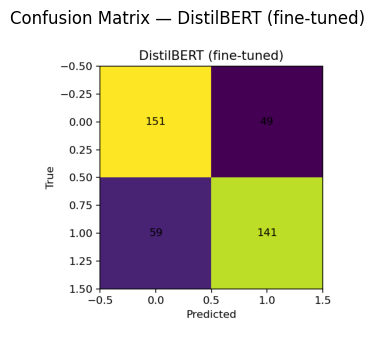

In [20]:
if os.path.exists(cm_path):
    img = plt.imread(cm_path)
    plt.figure(figsize=(4,4))
    plt.imshow(img)    # no explicit colors/style
    plt.axis('off')
    plt.title("Confusion Matrix — DistilBERT (fine-tuned)")
    plt.show()
else:
    print("confusion_matrix.png not found. Run: python stretch_distilbert.py")


## Error Analysis — Misclassified Reviews

We inspect misclassifications and their positive probabilities (`prob_pos`):
- **Uncertain** errors: probabilities near 0.5.
- **High-confidence FP** (pred=1, true=0): high `prob_pos`.
- **High-confidence FN** (pred=0, true=1): low `prob_pos`.


In [21]:
import numpy as np

if os.path.exists(errors_path):
    errors_df = pd.read_csv(errors_path)
    print("Total misclassified:", len(errors_df))

    # Uncertainty: closeness to 0.5
    errors_df["uncertainty"] = (errors_df["prob_pos"] - 0.5).abs()

    print("\nMost uncertain 10 errors (prob near 0.5):")
    display(errors_df.sort_values("uncertainty").head(10))

    print("\nHigh-confidence false positives (top 5):")
    fp = errors_df[(errors_df["true"]==0) & (errors_df["pred"]==1)]
    display(fp.sort_values("prob_pos", ascending=False).head(5))

    print("\nHigh-confidence false negatives (top 5):")
    fn = errors_df[(errors_df["true"]==1) & (errors_df["pred"]==0)]
    display(fn.sort_values("prob_pos", ascending=True).head(5))
else:
    print("errors.csv not found. Run: python stretch_distilbert.py")


Total misclassified: 108

Most uncertain 10 errors (prob near 0.5):


,true,pred,prob_pos,text_snippet,uncertainty
80,1,0,0.499558,i have seen several ( but not that many ) wood...,0.000442
92,1,0,0.498620,"here is a film that is so unexpected , so scar...",0.001380
19,0,1,0.505178,the most interesting thing about virus is that...,0.005178
18,0,1,0.505656,supposedly based on a true story in which the ...,0.005656
31,0,1,0.511087,my giant begins with a monologue that's more f...,0.011087
101,1,0,0.484805,""" the faculty , "" the heavily-hyped and adver...",0.015195
21,0,1,0.515274,i'm not sure i should be writing a review of t...,0.015274
2,1,0,0.481808,"i feel no hesitation in saying that "" there's ...",0.018192
59,0,1,0.518464,alexandre dumas meets hong kong action with ne...,0.018464
8,1,0,0.481292,did you ever wonder if dennis rodman was actua...,0.018708



High-confidence false positives (top 5):


,true,pred,prob_pos,text_snippet,uncertainty
87,0,1,0.880766,one might expect a cathartic viewing experienc...,0.380766
86,0,1,0.859734,shakespeare in love is quite possibly the most...,0.359734
24,0,1,0.858476,based on the novel set in 1914 by joseph conra...,0.358476
46,0,1,0.843636,"old soldiers never die , they just turn into c...",0.343636
15,0,1,0.840778,various films seen at the seattle film festiva...,0.340778



High-confidence false negatives (top 5):


,true,pred,prob_pos,text_snippet,uncertainty
6,1,0,0.165686,"a sci fi/comedy starring jack nicholson , pier...",0.334314
77,1,0,0.169452,""" desperate measures "" was something i was ex...",0.330548
44,1,0,0.200551,the happy bastard's quick movie review analyz...,0.299449
89,1,0,0.206068,"vannesa kensington : `austin , do you smoke af...",0.293932
9,1,0,0.206934,"usually when a blockbuster comes out , it's lo...",0.293066


# Predict & Explain — Track A vs B vs DistilBERT

This section runs **all three models** on any texts you provide and explains the outputs:
- `*_prob` = model’s probability of the **positive** class (1)
- `*_pred` = predicted class after applying a threshold (default 0.50)
We’ll also show how threshold changes affect labels.


In [22]:
import os, sys
import numpy as np
import pandas as pd

# For model loading
import joblib
from sentence_transformers import SentenceTransformer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Artifact dirs (change if your layout differs)
A_DIR = "outputs/track_a"      # TF-IDF + LR (Pipeline)
B_DIR = "outputs/track_b"      # MiniLM + LR (encoder.txt + joblib)
S_DIR = "outputs/stretch"      # DistilBERT fine-tuned (HF model dir)
S_MODEL_DIR = os.path.join(S_DIR, "model")

def softmax_np(logits: np.ndarray) -> np.ndarray:
    z = logits - logits.max(axis=1, keepdims=True)
    e = np.exp(z)
    return e / e.sum(axis=1, keepdims=True)

def snip(s, n=180):
    return s.replace("\n"," ")[:n]


In [23]:
# ---- Track A (TF-IDF + LR) ----
pipeA = joblib.load(os.path.join(A_DIR, "model.joblib"))

# ---- Track B (MiniLM + LR) ----
with open(os.path.join(B_DIR, "encoder.txt")) as f:
    enc_name = f.read().strip()
encB = SentenceTransformer(enc_name)
clfB = joblib.load(os.path.join(B_DIR, "model.joblib"))

# ---- DistilBERT (fine-tuned) ----
tokS = AutoTokenizer.from_pretrained(S_MODEL_DIR, use_fast=True)
mdlS = AutoModelForSequenceClassification.from_pretrained(S_MODEL_DIR)
device = torch.device(
    "cuda" if torch.cuda.is_available()
    else ("mps" if getattr(torch.backends, 'mps', None) and torch.backends.mps.is_available() else "cpu")
)
mdlS.to(device); mdlS.eval()


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [24]:
def predict_track_a(texts, threshold=0.5):
    proba = pipeA.predict_proba(texts)[:,1]
    pred = (proba >= threshold).astype(int)
    return proba, pred

def predict_track_b(texts, threshold=0.5, batch_size=64):
    X = encB.encode(texts, batch_size=batch_size, convert_to_numpy=True, show_progress_bar=False)
    proba = clfB.predict_proba(X)[:,1]
    pred = (proba >= threshold).astype(int)
    return proba, pred

def predict_stretch(texts, threshold=0.5, batch_size=32, max_len=256):
    all_probs = []
    with torch.no_grad():
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i+batch_size]
            enc = tokS(batch, truncation=True, max_length=max_len, padding=True, return_tensors="pt")
            enc = {k: v.to(device) for k, v in enc.items()}
            out = mdlS(**enc)
            probs = torch.softmax(out.logits, dim=-1)[:,1].detach().cpu().numpy()
            all_probs.append(probs)
    proba = np.concatenate(all_probs, axis=0)
    pred = (proba >= threshold).astype(int)
    return proba, pred


## Run predictions on your texts

- Edit `TEXTS` below (a list of strings).
- Optionally change `THRESHOLD` (per-model threshold; default 0.50).
- The table shows:
  - `A_prob`/`A_pred` → Track A (TF-IDF + LR)
  - `B_prob`/`B_pred` → Track B (MiniLM + LR)
  - `S_prob`/`S_pred` → DistilBERT (fine-tuned)


In [25]:
TEXTS = [
    "This movie was surprisingly great!",
    "I am hungry for pizza! I'll go get the ingredients.",
    "Outstanding film.",
    "Total waste of time."
]
THRESHOLD = 0.50

A_prob, A_pred = predict_track_a(TEXTS, threshold=THRESHOLD)
B_prob, B_pred = predict_track_b(TEXTS, threshold=THRESHOLD)
S_prob, S_pred = predict_stretch(TEXTS, threshold=THRESHOLD)

df = pd.DataFrame({
    "text": [snip(t, 120) for t in TEXTS],
    "A_prob": A_prob, "A_pred": A_pred,
    "B_prob": B_prob, "B_pred": B_pred,
    "S_prob": S_prob, "S_pred": S_pred
})
df


,text,A_prob,A_pred,B_prob,B_pred,S_prob,S_pred
0,This movie was surprisingly great!,0.586052,1,0.880828,1,0.572551,1
1,I am hungry for pizza! I'll go get the ingredi...,0.523191,1,0.916201,1,0.538938,1
2,Outstanding film.,0.720232,1,0.859251,1,0.561702,1
3,Total waste of time.,0.226173,0,0.397460,0,0.488348,0


## How to read the numbers

- **`*_prob`**: model’s estimated probability that the text is **positive** (class 1).  
  - Example: `S_prob=0.486` → 48.6% positive → borderline/uncertain.
- **`*_pred`**: hard label after applying the threshold (default `0.50`).  
  - If `prob >= threshold` → 1 (positive), else 0 (negative).

**Why models disagree**
- **Track A (TF-IDF)** is literal; if the exact n-grams are strongly associated with sentiment in training, its `*_prob` moves far from 0.5; otherwise it stays near neutral.  
- **Track B (MiniLM embeddings)** captures context and synonyms, often producing confident scores even for phrasing it hasn’t seen.  
- **DistilBERT (fine-tuned)** adapts to the dataset, but with only 1–2 epochs may be **conservative** on short texts. If you see many 0.45–0.55 scores, either lower the threshold slightly (e.g., 0.45) or train an extra epoch.

**Out-of-domain text** (not a movie review) can push TF-IDF to stay near 0.5, while embeddings might still assign a positive “vibe.” Always interpret such scores with caution.
